C:\Users\shiva\AppData\Local\Temp\ipykernel_7220\1401448297.py:8: RuntimeWarning: divide by zero encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)
C:\Users\shiva\AppData\Local\Temp\ipykernel_7220\1401448297.py:8: RuntimeWarning: invalid value encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)


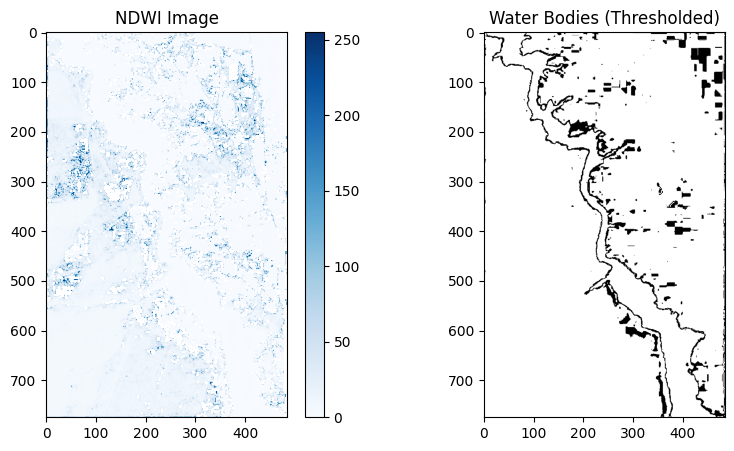

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2  # For reading JPG images

def calculate_ndwi(green_band, nir_band):
    """Calculate NDWI using green and NIR bands."""
    return (green_band - nir_band) / (green_band + nir_band)

def process_image(image_path):
    """Process a single image to calculate NDWI and generate water mask."""
    # Read the image (assuming it's a JPG)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the Green (B03) and NIR (B08) bands. 
    # For this example, we will simulate the bands since RGB doesn't have NIR.
    green_band = image[:, :, 1]  # Green channel (G)
    nir_band = image[:, :, 0]     # Simulated NIR using Red channel (R)

    # Calculate NDWI
    ndwi = calculate_ndwi(green_band, nir_band)

    # Apply threshold to classify water
    water_mask = ndwi > 0.3  # Adjust threshold as necessary

    return ndwi, water_mask

def visualize_results(ndwi, water_mask):
    """Visualize the NDWI and water mask."""
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('NDWI Image')
    plt.imshow(ndwi, cmap='Blues')
    plt.colorbar()
    
    plt.subplot(1, 2, 2)
    plt.title('Water Bodies (Thresholded)')
    plt.imshow(water_mask, cmap='gray')
    plt.show()

# Path to your input image
image_path = 'Water Bodies Dataset/Images/water_body_855.jpg'  # Replace with your JPG image path

# Process the image and visualize the results
ndwi, water_mask = process_image(image_path)
visualize_results(ndwi, water_mask)


C:\Users\shiva\AppData\Local\Temp\ipykernel_7220\2231041083.py:9: RuntimeWarning: divide by zero encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)
C:\Users\shiva\AppData\Local\Temp\ipykernel_7220\2231041083.py:9: RuntimeWarning: invalid value encountered in divide
  return (green_band - nir_band) / (green_band + nir_band)


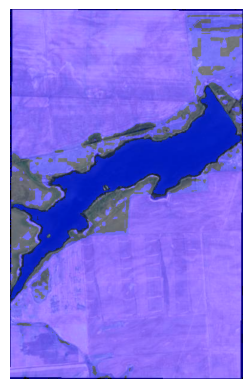

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os  # For handling file paths and directories

def calculate_ndwi(green_band, nir_band):
    """Calculate NDWI using green and NIR bands."""
    return (green_band - nir_band) / (green_band + nir_band)

def process_image(image_path):
    """Process a single image to calculate NDWI and generate water mask."""
    # Read the image (assuming it's a JPG)
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the Green (B03) and NIR (B08) bands. 
    # For this example, we will simulate the bands since RGB doesn't have NIR.
    green_band = image[:, :, 1]  # Green channel (G)
    nir_band = image[:, :, 0]     # Simulated NIR using Red channel (R)

    # Calculate NDWI
    ndwi = calculate_ndwi(green_band, nir_band)

    # Apply threshold to classify water
    water_mask = ndwi > 0.3  # Adjust threshold as necessary

    return image, water_mask  # Return original image and water mask

def visualize_and_save_results(image, water_mask, output_path):
    """Visualize the original image with water bodies highlighted and save the result."""
    # Create a colored mask for water
    color_mask = np.zeros_like(image, dtype=np.uint8)  # Initialize a color mask
    color_mask[water_mask] = [0, 0, 255]  # Set water areas to blue (RGB)

    # Overlay the water mask on the original image
    highlighted_image = cv2.addWeighted(image, 1, color_mask, 0.5, 0)  # Blend original and mask

    # Save the highlighted image to the output folder
    os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create directory if it doesn't exist
    cv2.imwrite(output_path, cv2.cvtColor(highlighted_image, cv2.COLOR_RGB2BGR))  # Save in BGR format

    # Display the image
    plt.imshow(highlighted_image)
    plt.axis('off')  # Turn off axis
    plt.show()

# Path to your input image
image_path = 'test/water_body_1018.jpg'  # Replace with your JPG image path

# Path to save the output image
output_path = 'output_images/water_highlighted_image_1018.jpg'

# Process the image and visualize the results
image, water_mask = process_image(image_path)
visualize_and_save_results(image, water_mask, output_path)


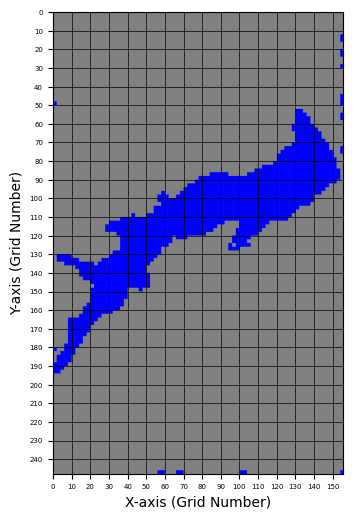

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    """Apply Gaussian blur to smooth edges and enhance water regions."""
    blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Smoothing
    return blurred

def create_grid_map(image_path, output_path, grid_size=5):
    """Divide image into small grids, color-code water vs. non-water regions, and add grid lines and limited axis labels."""
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Preprocess the image for smoother regions
    image = preprocess_image(image)

    # Get image dimensions
    height, width, _ = image.shape
    
    # Create an empty grid image
    grid_image = np.zeros_like(image)
    
    # Define flexible thresholds for blue detection
    blue_lower = np.array([0, 0, 180])  # Lower threshold for blue
    blue_upper = np.array([70, 70, 255])  # Upper threshold for blue

    # Apply color thresholding
    mask = cv2.inRange(image, blue_lower, blue_upper)

    # Refine the mask with morphological operations
    kernel = np.ones((7, 7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # Closing to fill gaps
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)  # Dilation to expand areas

    # Iterate over the image with `grid_size` and mark water areas
    for y in range(0, height, grid_size):
        for x in range(0, width, grid_size):
            # Extract the current grid cell from the mask
            cell_mask = mask[y:y+grid_size, x:x+grid_size]
            
            # Check if a significant portion of the cell is detected as water
            if np.mean(cell_mask) > 128:  # Majority water pixels in the cell
                grid_image[y:y+grid_size, x:x+grid_size] = [0, 0, 255]  # Blue for water
            else:
                grid_image[y:y+grid_size, x:x+grid_size] = [128, 128, 128]  # Gray for non-water

    # Save the grid image
    cv2.imwrite(output_path, cv2.cvtColor(grid_image, cv2.COLOR_RGB2BGR))

    # Display the result with grid lines and limited axis labels
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_image)
    
    # Add grid lines
    plt.grid(visible=True, color="black", linestyle="-", linewidth=0.5)

    # Set ticks every 10th grid based on grid size
    x_ticks = np.arange(0, width, 5 * grid_size)
    y_ticks = np.arange(0, height, 5 * grid_size)
    
    # Set axis ticks and labels
    plt.xticks(x_ticks, labels=np.arange(0, len(x_ticks) * 10, 10), fontsize=5)
    plt.yticks(y_ticks, labels=np.arange(0, len(y_ticks) * 10, 10), fontsize=5)
    
    plt.xlabel('X-axis (Grid Number)')
    plt.ylabel('Y-axis (Grid Number)')
    
    plt.axis('on')  # Show axis
    plt.show()
    
    return grid_image

# Path to the saved water-highlighted image
image_path = 'output_images/water_highlighted_image_1018.jpg'
output_path = 'output_images/grid_image_1018.jpg'  # Path to save the grid image

# Generate grid map with adjusted water detection and grid lines
grid_image = create_grid_map(image_path, output_path)


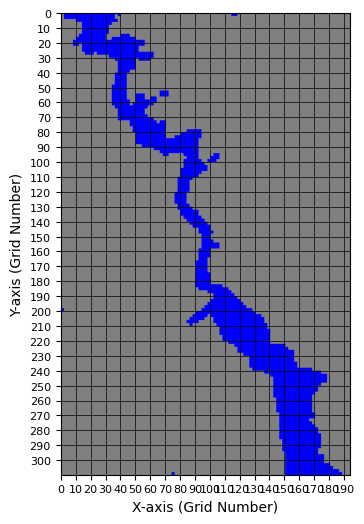

Grid box (0, 0): Gray
Grid box (1, 0): Blue
Grid box (2, 0): Blue
Grid box (3, 0): Blue
Grid box (4, 0): Blue
Grid box (5, 0): Blue
Grid box (6, 0): Blue
Grid box (7, 0): Blue
Grid box (8, 0): Blue
Grid box (9, 0): Blue
Grid box (10, 0): Blue
Grid box (11, 0): Blue
Grid box (12, 0): Blue
Grid box (13, 0): Blue
Grid box (14, 0): Blue
Grid box (15, 0): Blue
Grid box (16, 0): Blue
Grid box (17, 0): Blue
Grid box (18, 0): Gray
Grid box (19, 0): Blue
Grid box (20, 0): Gray
Grid box (21, 0): Gray
Grid box (22, 0): Gray
Grid box (23, 0): Gray
Grid box (24, 0): Gray
Grid box (25, 0): Gray
Grid box (26, 0): Gray
Grid box (27, 0): Gray
Grid box (28, 0): Gray
Grid box (29, 0): Gray
Grid box (30, 0): Gray
Grid box (31, 0): Gray
Grid box (32, 0): Gray
Grid box (33, 0): Gray
Grid box (34, 0): Gray
Grid box (35, 0): Gray
Grid box (36, 0): Gray
Grid box (37, 0): Gray
Grid box (38, 0): Gray
Grid box (39, 0): Gray
Grid box (40, 0): Gray
Grid box (41, 0): Gray
Grid box (42, 0): Gray
Grid box (43, 0): Gra

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    """Apply Gaussian blur to smooth edges and enhance water regions."""
    blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Smoothing
    return blurred

def create_grid_map(image_path, output_path, grid_size=5):
    """Divide image into small grids, color-code water vs. non-water regions, and add grid lines and limited axis labels."""
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Preprocess the image for smoother regions
    image = preprocess_image(image)

    # Get image dimensions
    height, width, _ = image.shape
    
    # Create an empty grid image
    grid_image = np.zeros_like(image)
    
    # Define flexible thresholds for blue detection
    blue_lower = np.array([0, 0, 180])  # Lower threshold for blue
    blue_upper = np.array([70, 70, 255])  # Upper threshold for blue

    # Apply color thresholding
    mask = cv2.inRange(image, blue_lower, blue_upper)

    kernel = np.ones((7, 7), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) 
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)  

    # Dictionary to hold the status of each grid cell
    grid_status_dict = {}

    # Iterate over the image with `grid_size` and mark water areas
    for y in range(0, height, grid_size):
        for x in range(0, width, grid_size):
            # Extract the current grid cell from the mask
            cell_mask = mask[y:y+grid_size, x:x+grid_size]
            
            
            if np.mean(cell_mask) > 128:  
                grid_image[y:y+grid_size, x:x+grid_size] = [0, 0, 255]  # Blue for water
                grid_status_dict[(x // grid_size, y // grid_size)] = 'Blue'  # Mark as blue
            else:
                grid_image[y:y+grid_size, x:x+grid_size] = [128,128,128]  # Black for non-water
                grid_status_dict[(x // grid_size, y // grid_size)] = 'Gray'  # Mark as gray
    # Save the grid image
    cv2.imwrite(output_path, cv2.cvtColor(grid_image, cv2.COLOR_RGB2BGR))

    # Display the result with grid lines and limited axis labels
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_image)
    
    # Add grid lines
    plt.grid(visible=True, color="black", linestyle="-", linewidth=0.5)

    # Set ticks every 10th grid based on grid size
    x_ticks = np.arange(0, width, 5 * grid_size)
    y_ticks = np.arange(0, height, 5 * grid_size)
    
    # Set axis ticks and labels
    plt.xticks(x_ticks, labels=np.arange(0, len(x_ticks) * 10, 10), fontsize=8)
    plt.yticks(y_ticks, labels=np.arange(0, len(y_ticks) * 10, 10), fontsize=8)
    
    plt.xlabel('X-axis (Grid Number)')
    plt.ylabel('Y-axis (Grid Number)')
    
    plt.axis('on')  # Show axis
    plt.show()

    # Print grid status
    for position, status in grid_status_dict.items():
        print(f'Grid box {position}: {status}')

    return grid_image, grid_status_dict  # Return grid image and status dictionary

# Path to the saved water-highlighted image
image_path = 'output_images/water_highlighted_image_855.jpg'
output_path = 'output_images/grid_image_855.jpg'  # Path to save the grid image

# Generate grid map with adjusted water detection and grid lines
grid_image, grid_status = create_grid_map(image_path, output_path)

# Now you can use grid_status for further processing


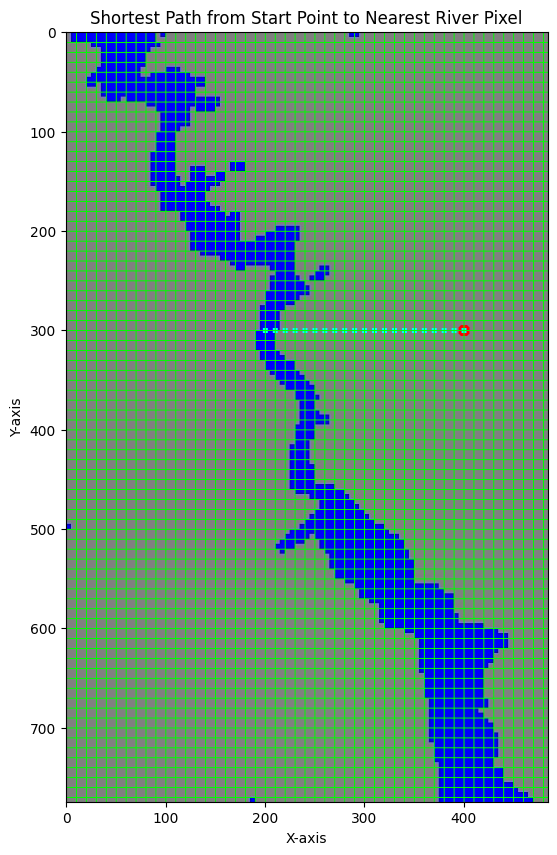

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def mark_point_and_show_grid_with_path(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest path to the nearest river (blue pixel)."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions

    # Mark the start point
    x, y = start_point
    cv2.circle(image_rgb, (x, y), 6, (255, 0, 0), -1)  # Mark start point in red

    # Set up BFS for shortest path to nearest blue pixel
    height, width = mask.shape
    visited = np.zeros((height, width), dtype=bool)
    queue = deque([(x, y, [])])  # Queue holds tuples of (x, y, path_taken)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, down, left, right movements

    shortest_path = None
    while queue:
        cx, cy, path = queue.popleft()
        if mask[cy, cx] == 255:  # Found a blue pixel
            shortest_path = path + [(cx, cy)]
            break
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and not visited[ny, nx]:
                visited[ny, nx] = True
                queue.append((nx, ny, path + [(cx, cy)]))

    # Draw the shortest path if found
    if shortest_path:
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (0, 255, 255), -1)  # Yellow circles for path

    # Draw grid lines
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Path from Start Point to Nearest River Pixel")
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_path(image_path, start_point=(400, 300))  # Adjust start point as needed


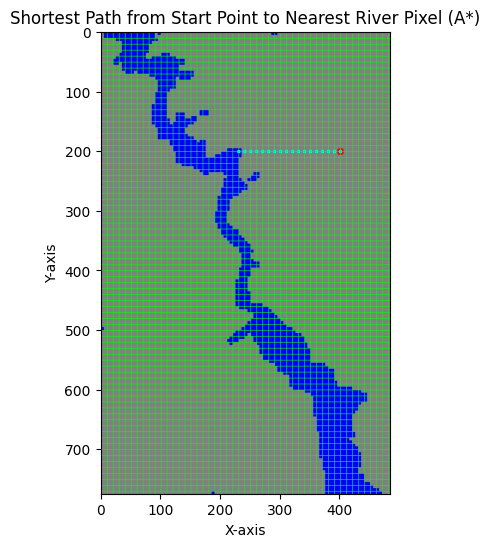

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_a_star_path(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest path to the nearest river (blue pixel) using A*."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # A* Setup
    height, width = mask.shape
    visited = set()
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (priority, x, y, path)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, down, left, right movements

    # Heuristic function (Manhattan distance to the closest river pixel)
    def heuristic(x, y):
        river_positions = np.column_stack(np.where(mask == 255))
        return np.min(np.abs(river_positions[:, 0] - y) + np.abs(river_positions[:, 1] - x))

    # A* search
    shortest_path = None
    while priority_queue:
        cost, cx, cy, path = heappop(priority_queue)
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            shortest_path = path + [(cx, cy)]
            break

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_cost = cost + 1  # Each step has a cost of 1
                total_cost = new_cost + heuristic(nx, ny)
                heappush(priority_queue, (total_cost, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path if found
    if shortest_path:
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (0, 255, 255), -1)  # Yellow circles for path

    # Draw grid lines
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(6,6))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Path from Start Point to Nearest River Pixel (A*)")
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_a_star_path(image_path, start_point=(400, 200))  # Adjust start point as needed


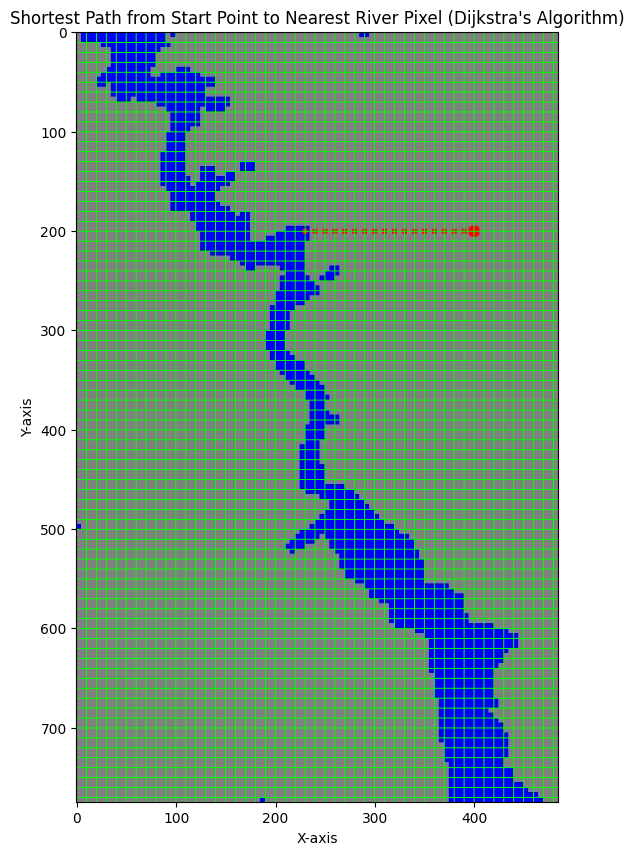

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest path to the nearest river (blue pixel) using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = { (sx, sy): 0 }
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, down, left, right movements

    # Dijkstra's search
    shortest_path = None
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            shortest_path = path + [(cx, cy)]
            break

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + 1  # Each step has a cost of 1
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path if found
    if shortest_path:
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (255, 0, 0), -1)  # Red circles for path

    # Draw grid lines as vertices
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Path from Start Point to Nearest River Pixel (Dijkstra's Algorithm)")
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200))  # Adjust start point as needed


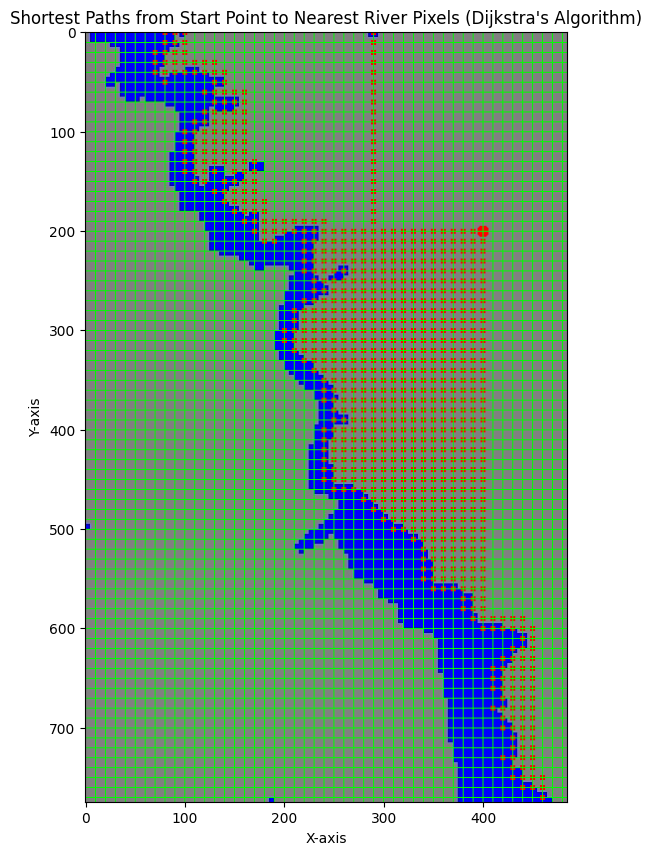

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {(sx, sy): 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, down, left, right movements

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + 1  # Each step has a cost of 1
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest paths to all found rivers
    for path in river_paths:
        for (px, py) in path:
            cv2.circle(image_rgb, (px, py), 3, (255, 0, 0), -1)  # Red circles for paths

    # Draw grid lines as vertices
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Paths from Start Point to Nearest River Pixels (Dijkstra's Algorithm)")
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200))  # Adjust start point as needed


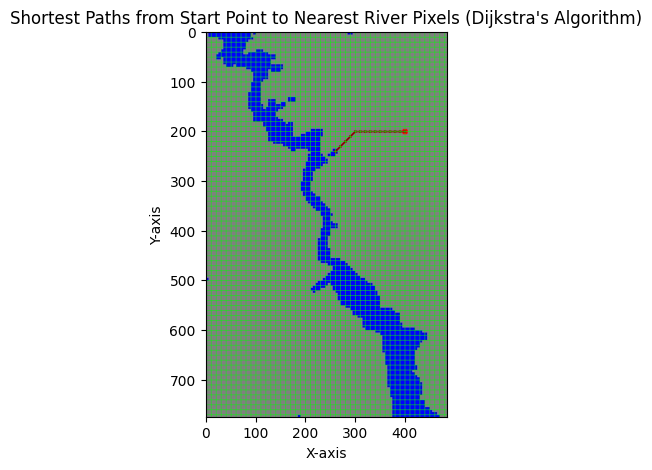

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {(sx, sy): 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)

    # Directions: up, down, left, right, and diagonals
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]  # Include diagonals

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + (1.414 if abs(dx) + abs(dy) == 2 else 1)  # Cost for diagonal movement is sqrt(2)
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if river_paths:
        shortest_path = river_paths[0]  # Get the first river path
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path
            # Connect points with lines for better visualization
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line

    # Draw grid lines as vertices
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(5,5))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Paths from Start Point to Nearest River Pixels (Dijkstra's Algorithm)")
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200))  # Adjust start point as needed


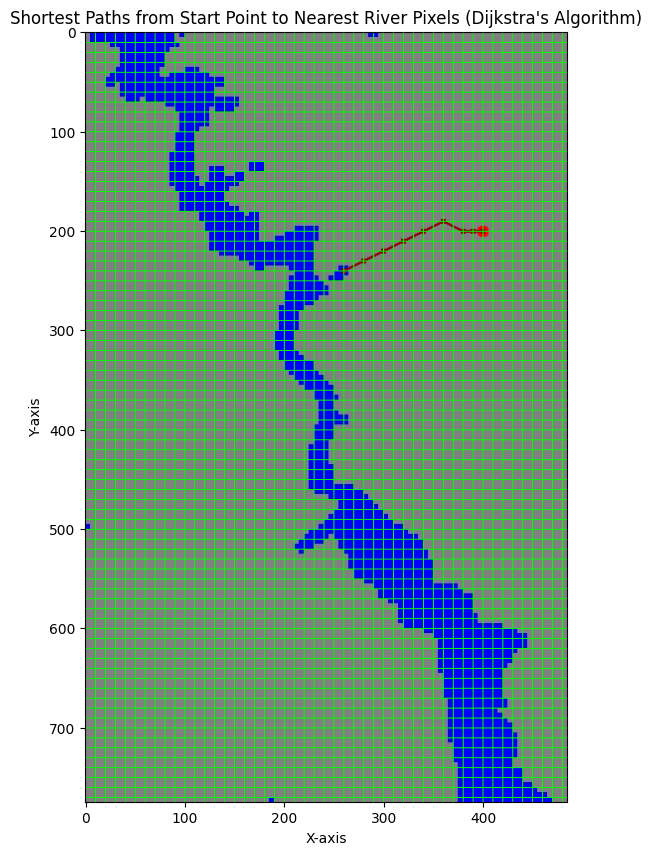

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {(sx, sy): 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)

    # Directions: up, down, left, right, and diagonals (including full diagonals)
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1),  # Diagonals
        (-1, -2), (-2, -1), (-1, 2), (2, -1),  # Extended diagonals
        (1, 2), (2, 1), (1, -2), (-2, 1)  # Extended diagonals
    ]

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                # Calculate distance based on direction type
                if dx != 0 and dy != 0:  # Diagonal
                    new_distance = current_distance + np.sqrt(2)  # Cost for diagonal movement
                else:  # Straight
                    new_distance = current_distance + 1  # Cost for straight movement
                    
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if river_paths:
        shortest_path = river_paths[0]  # Get the first river path
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path
            # Connect points with lines for better visualization
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line

    # Draw grid lines as vertices
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Paths from Start Point to Nearest River Pixels (Dijkstra's Algorithm)")
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200))  # Adjust start point as needed


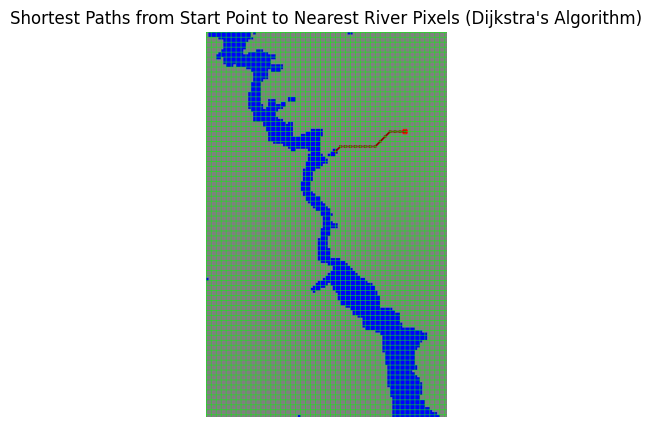

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400,200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {start_point: 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)

    # Directions: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Cost for diagonal movement
                
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if river_paths:
        shortest_path = river_paths[0]  # Get the first river path
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path
            # Connect points with lines for better visualization
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line

    # Draw grid lines as vertices
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(5,5))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Paths from Start Point to Nearest River Pixels (Dijkstra's Algorithm)")
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400,200))  # Adjust start point as needed


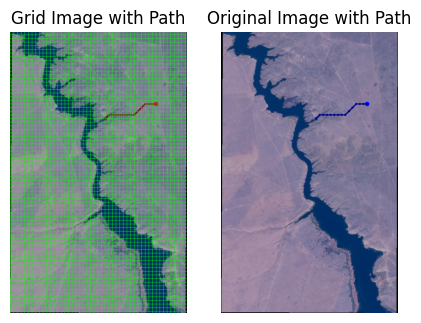

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    original_image = image.copy()  # Copy of the original image for marking

    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red on image with grid
    cv2.circle(original_image, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red on original image

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {start_point: 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)

    # Directions: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Cost for diagonal movement
                
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if river_paths:
        shortest_path = river_paths[0]  # Get the first river path
        for (px, py) in shortest_path:
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path on grid image
            cv2.circle(original_image, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path on original image
            
            # Connect points with lines for better visualization
            if shortest_path.index((px, py)) > 0:
                prev_px, prev_py = shortest_path[shortest_path.index((px, py)) - 1]
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line on grid image
                cv2.line(original_image, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line on original image

    # Draw grid lines as vertices on the grid image
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display both images
    plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Grid Image with Path")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image with Path")
    plt.axis('off')

    plt.show()

# Example usage
image_path = 'Water Bodies Dataset/Images/water_body_855.jpg'  # Path to your grid image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200))  # Adjust start point as needed


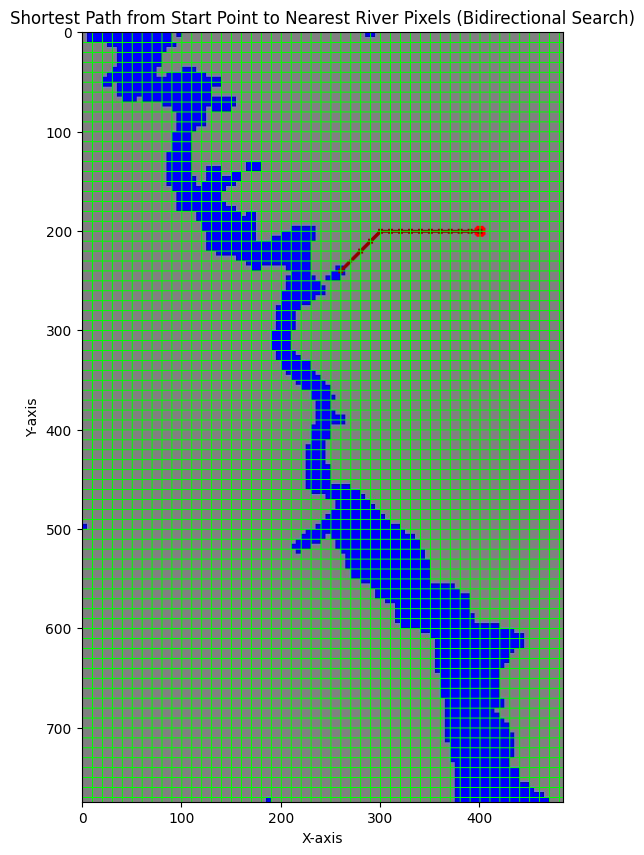

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

def mark_point_and_show_grid_with_bidirectional_search(image_path, start_point=(400, 200), grid_size=10):
    """Display image with grid markings, mark the start point, and visualize the shortest paths to all river pixels using bidirectional search."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Bidirectional BFS Setup
    height, width = mask.shape
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]  # Include diagonals
    
    # Initialize forward and backward queues and visited sets
    forward_queue = deque([(sx, sy, [])])  # Starting from source
    backward_queue = deque([(x, y, []) for y in range(0, height, grid_size) for x in range(0, width, grid_size) if mask[y, x] == 255])  # All river pixels
    forward_visited = {(sx, sy): []}
    backward_visited = {pos: [] for pos, _, _ in backward_queue}

    # Perform bidirectional BFS
    intersecting_path = None
    while forward_queue and backward_queue:
        # Forward step
        if forward_queue:
            fx, fy, fpath = forward_queue.popleft()
            for dx, dy in directions:
                nx, ny = fx + dx * grid_size, fy + dy * grid_size
                if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in forward_visited:
                    forward_visited[(nx, ny)] = fpath + [(fx, fy)]
                    forward_queue.append((nx, ny, fpath + [(fx, fy)]))
                    
                    # Check for intersection with backward search
                    if (nx, ny) in backward_visited:
                        intersecting_path = forward_visited[(nx, ny)] + list(reversed(backward_visited[(nx, ny)]))
                        break

        # Backward step
        if backward_queue:
            bx, by, bpath = backward_queue.popleft()
            for dx, dy in directions:
                nx, ny = bx + dx * grid_size, by + dy * grid_size
                if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in backward_visited:
                    backward_visited[(nx, ny)] = bpath + [(bx, by)]
                    backward_queue.append((nx, ny, bpath + [(bx, by)]))
                    
                    # Check for intersection with forward search
                    if (nx, ny) in forward_visited:
                        intersecting_path = forward_visited[(nx, ny)] + list(reversed(backward_visited[(nx, ny)]))
                        break

        # Stop if intersection found
        if intersecting_path:
            break

    # Draw the shortest path to the nearest river if found
    if intersecting_path:
        for (px, py) in intersecting_path:
            cv2.circle(image_rgb, (px, py), 3, (139, 0, 0), -1)  # Dark red circles for path
            if intersecting_path.index((px, py)) > 0:
                prev_px, prev_py = intersecting_path[intersecting_path.index((px, py)) - 1]
                cv2.line(image_rgb, (prev_px, prev_py), (px, py), (139, 0, 0), 2)  # Dark red line

    # Draw grid lines as vertices
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Shortest Path from Start Point to Nearest River Pixels (Bidirectional Search)")
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_bidirectional_search(image_path, start_point=(400, 200))  # Adjust start point as needed


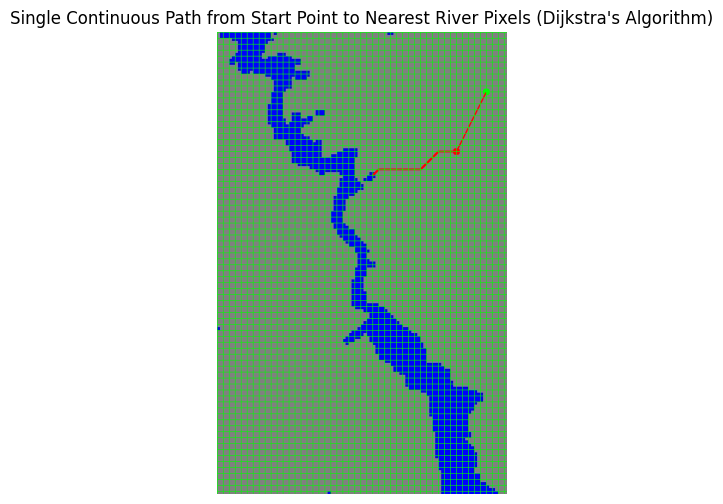

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from heapq import heappop, heappush

def mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200), second_point=(400, 100), grid_size=10):
    """Display image with grid markings, mark the start point and second point, and visualize the shortest paths to all river pixels using Dijkstra's algorithm."""
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Convert image to HSV to detect blue regions (river)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_blue = np.array([100, 150, 0])
    upper_blue = np.array([140, 255, 255])
    mask = cv2.inRange(hsv_image, lower_blue, upper_blue)  # Create mask for blue regions (river pixels)

    # Mark the start point
    sx, sy = start_point
    cv2.circle(image_rgb, (sx, sy), 6, (255, 0, 0), -1)  # Mark start point in red

    # Mark the second point
    second_x, second_y = second_point
    cv2.circle(image_rgb, (second_x, second_y), 6, (0, 255, 0), -1)  # Mark second point in green

    # Dijkstra's Setup
    height, width = mask.shape
    visited = set()
    distances = {start_point: 0}
    priority_queue = []
    heappush(priority_queue, (0, sx, sy, []))  # (distance, x, y, path)

    # Directions: up, down, left, right, and diagonals
    directions = [
        (-1, 0), (1, 0), (0, -1), (0, 1),  # Up, down, left, right
        (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
    ]

    # Store paths to all river pixels
    river_paths = []
    
    # Dijkstra's search
    while priority_queue:
        current_distance, cx, cy, path = heappop(priority_queue)
        
        if (cx, cy) in visited:
            continue
        visited.add((cx, cy))

        # If we reached a blue pixel (river), save the path
        if mask[cy, cx] == 255:  # Found a blue pixel (river)
            river_paths.append(path + [(cx, cy)])  # Store the path to the river
            continue  # Continue searching for other rivers

        # Explore neighbors
        for dx, dy in directions:
            nx, ny = cx + dx * grid_size, cy + dy * grid_size
            if 0 <= nx < width and 0 <= ny < height and (nx, ny) not in visited:
                new_distance = current_distance + (np.sqrt(2) if (dx != 0 and dy != 0) else 1)  # Cost for diagonal movement
                
                if (nx, ny) not in distances or new_distance < distances[(nx, ny)]:
                    distances[(nx, ny)] = new_distance
                    heappush(priority_queue, (new_distance, nx, ny, path + [(cx, cy)]))

    # Draw the shortest path to the first found river
    if river_paths:
        shortest_path = river_paths[0]  # Get the first river path

        # Connect all points in the shortest path with a single red line
        for i in range(len(shortest_path) - 1):
            cv2.line(image_rgb, shortest_path[i], shortest_path[i + 1], (255, 0, 0), 2)  # Red line for the path

        # Connect the second point to the nearest river path
        if shortest_path:
            cv2.line(image_rgb, (second_x, second_y), shortest_path[0], (255, 0, 0), 2)  # Red line to connect to the first river point

    # Draw grid lines as vertices
    for i in range(0, width, grid_size):
        cv2.line(image_rgb, (i, 0), (i, height), (0, 255, 0), 1)  # Vertical grid lines in green
    for j in range(0, height, grid_size):
        cv2.line(image_rgb, (0, j), (width, j), (0, 255, 0), 1)  # Horizontal grid lines in green

    # Display the result
    plt.figure(figsize=(6,6))
    plt.imshow(image_rgb)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Single Continuous Path from Start Point to Nearest River Pixels (Dijkstra's Algorithm)")
    plt.axis('off')
    plt.show()

# Example usage
image_path = 'output_images/grid_image_855.jpg'  # Path to your image
mark_point_and_show_grid_with_dijkstra_path(image_path, start_point=(400, 200), second_point=(450, 100))  # Adjust points as needed
